<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---
# **Ações de Dividendos vs Crescimento** 
---

Nosso objetivo neste código será entender alguns dos conceitos relacionados ao retorno esperado ao se comprar/vender ações. Trabalharemos os eventos de pagamentos de dividendos e seus impactos nos preços das ações, os ganhos relacionados apenas à valorização do ativo e alguns conceitos como "preço ajustado".

**Atenção:**<p>
O conteúdo apresentado foi elaborado para fins exclusivamente educacionais e não constitui qualquer tipo de indicação/sugestão de compra/venda de qualquer produto.<br/>

---

# **1. Bibliotecas utilizadas**

In [ ]:
# Importantes bibliotecas provedoras de dados de cotações
%pip install yfinance
%pip install vectorbt

In [2]:
# Análise de dados e datas
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz

# Análises estatisticas
from scipy import stats
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import pylab

# Importação cotações OHLC e dividendos
import yfinance as yf

# Bibliotecas gráficas
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

# **2. Análises de Dividendos**

## 2.1. Obtenção dos dados

Lista atual (25/11/2022) do IBOV (92 ativos)<p>
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm)

In [3]:
ativos_IBOV = ["ABEV3", "ALPA4", "AMER3", "ARZZ3", "ASAI3", "AZUL4", "B3SA3", "BBAS3", "BBDC3", "BBDC4", "BBSE3", "BEEF3", "BPAC11", "BPAN4", "BRAP4", "BRFS3",
               "BRKM5", "BRML3", "CASH3", "CCRO3", "CIEL3", "CMIG4", "CMIN3", "COGN3", "CPFE3", "CPLE6", "CRFB3", "CSAN3", "CSNA3", "CVCB3", "CYRE3", "DXCO3",
               "ECOR3", "EGIE3", "ELET3", "ELET6", "EMBR3", "ENBR3", "ENEV3", "ENGI11", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "HAPV3", "HYPE3",
               "IGTI11", "IRBR3", "ITSA4", "ITUB4", "JBSS3", "KLBN11", "LREN3", "LWSA3", "MGLU3", "MRFG3", "MRVE3", "MULT3", "NTCO3", "PCAR3", "PETR3", "PETR4",
               "PETZ3", "POSI3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "RAIZ4", "RDOR3", "RENT3", "RRRP3", "SANB11", "SBSP3", "SLCE3", "SMTO3", "SOMA3", "SULA11",
               "SUZB3", "TAEE11", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VBBR3", "VIIA3", "VIVT3", "WEGE3", "YDUQ3"]

ativos_IBOV_yf = [ativos_IBOV + '.SA' for ativos_IBOV in ativos_IBOV]

In [4]:
df_dividendos = pd.DataFrame()

for i in ativos_IBOV_yf:
    dividendos = yf.Ticker(i).dividends.to_frame(name=i.replace('.SA',''))
    df_dividendos = pd.merge(df_dividendos, dividendos, left_index=True, right_index=True, how='outer')

In [5]:
df_close = pd.DataFrame()

for i in ativos_IBOV_yf:
    close = yf.Ticker(i).history(period='max').Close.to_frame(name=i.replace('.SA',''))
    df_close = pd.merge(df_close, close, left_index=True, right_index=True, how='outer')

## 2.2. Dividendos pagos nos últimos anos

In [6]:
ano_inicial = '2013'

df_dividendos_filtro = df_dividendos[df_dividendos.index>=ano_inicial]
df_close_filtro = df_close[df_close.index>=ano_inicial]

In [7]:
df_dividendos_filtro['Ano'] = df_dividendos_filtro.index.year
df_close_filtro['Ano'] = df_close_filtro.index.year

In [8]:
tab_dinamica_dividendos = pd.pivot_table(df_dividendos_filtro, values=df_dividendos_filtro, index=['Ano'], columns=[], aggfunc='sum')
tab_dinamica_close = pd.pivot_table(df_close_filtro, values=df_close_filtro, index=['Ano'], columns=[], aggfunc='last')

In [9]:
ativos_filtro = pd.pivot_table(df_close_filtro, values=df_close_filtro, index=['Ano'], columns=[], aggfunc='first')

ls_ativos_filtro = []

for i in ativos_filtro:
    if ativos_filtro[i].iloc[0]>0:
        ls_ativos_filtro.append(i)

tab_dinamica_dividendos = tab_dinamica_dividendos[ls_ativos_filtro]
tab_dinamica_close = tab_dinamica_close[ls_ativos_filtro]

In [10]:
tab_dinamica_DY = (tab_dinamica_dividendos/tab_dinamica_close*100).apply(lambda x: x.round(2))
tab_dinamica_DY

,ABEV3,ALPA4,AMER3,ARZZ3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VIVT3,WEGE3,YDUQ3
Ano,,,,,,,,,,,,,,,,,,,,,
2013,2.05,1.80,0.00,2.99,9.45,16.40,3.42,4.38,3.14,0.00,...,21.80,1.60,2.27,1.25,0.00,4.66,2.28,19.50,2.55,0.59
2014,4.85,3.25,0.00,2.25,5.55,10.99,4.82,5.27,6.62,0.00,...,21.34,3.77,3.10,1.45,0.00,13.65,0.00,13.02,2.41,1.11
2015,10.71,14.18,0.00,4.34,9.26,19.92,8.02,9.64,11.53,0.00,...,23.95,2.70,3.98,1.29,2.48,11.24,11.57,12.90,2.92,3.08
2016,4.56,3.21,0.00,3.80,3.73,4.43,5.17,5.82,9.34,0.00,...,23.33,2.94,4.03,1.20,0.00,0.97,0.07,7.51,2.65,12.72
2017,2.88,2.04,0.00,3.29,2.38,3.92,4.25,4.50,8.59,2.96,...,13.66,1.26,1.23,1.16,0.00,4.71,0.34,9.99,1.59,0.98
2018,3.93,2.80,0.00,2.48,3.04,4.13,3.58,3.51,14.92,0.00,...,17.10,2.31,0.88,1.37,0.60,5.30,0.27,11.07,1.90,7.41
2019,2.82,0.00,0.00,2.28,2.13,7.07,5.91,8.32,5.31,0.00,...,8.23,3.30,0.79,1.07,1.93,3.55,0.00,6.66,1.02,1.12
2020,2.76,0.13,0.00,0.80,2.87,4.35,2.80,2.73,15.67,2.94,...,11.68,4.01,0.75,0.50,0.34,3.54,0.00,12.34,0.59,1.58
2021,4.41,0.74,0.00,1.22,9.09,8.32,5.97,5.53,5.17,11.02,...,13.45,3.40,1.08,2.89,9.91,20.52,0.00,7.48,1.30,2.30


## 2.3. Análises descritivas dos dividendos

In [11]:
df_EAD_ativos = pd.DataFrame()

for i in tab_dinamica_DY:
    stat, p = shapiro(tab_dinamica_DY[i])
    mean = np.mean(tab_dinamica_DY[i])
    median = np.median(tab_dinamica_DY[i])
    diff_mean_median = abs(mean - median)/max(mean,median)*100
    std = np.std(tab_dinamica_DY[i])
    cv = std/mean*100
    diff_0 = len(tab_dinamica_DY[i][tab_dinamica_DY[i]>0])
    cum_prod = (1+tab_dinamica_DY[i]/100).cumprod().iloc[-1]
    ativo_stats = pd.DataFrame([i, mean, median, cum_prod, std, cv, p, diff_0, diff_mean_median]).transpose()
    ativo_stats = ativo_stats.applymap(lambda x: round(x, 3) if isinstance(x, (float, int)) else x)
    df_EAD_ativos = pd.concat([df_EAD_ativos,ativo_stats],axis=0)

df_EAD_ativos.columns = ['Ativo', 'Media', 'Median', 'Cum_prod', 'DP', 'CV', 'p_valor', 'diff_0', 'diff_mean_median']

c:\Users\jamir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\jamir\AppData\Local\Temp\ipykernel_15736\923718421.py:7: RuntimeWarning: invalid value encountered in double_scalars
  diff_mean_median = abs(mean - median)/max(mean,median)*100
C:\Users\jamir\AppData\Local\Temp\ipykernel_15736\923718421.py:9: RuntimeWarning: invalid value encountered in double_scalars
  cv = std/mean*100
c:\Users\jamir\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\jamir\AppData\Local\Temp\ipykernel_15736\923718421.py:7: RuntimeWarning: invalid value encountered in double_scalars
  diff_mean_median = abs(mean - median)/max(mean,median)*100
C:\Users\jamir\AppData

In [12]:
df_EAD_ativos.sort_values(by='Cum_prod', ascending=False).head(15)

,Ativo,Media,Median,Cum_prod,DP,CV,p_valor,diff_0,diff_mean_median
0,TAEE11,16.440,15.380,4.530,5.541,33.707,0.288,10,6.448
0,CMIG4,14.054,12.145,3.545,11.823,84.128,0.025,10,13.583
0,BRAP4,13.807,8.500,3.441,12.790,92.632,0.011,10,38.437
0,PETR4,14.016,6.020,3.264,19.609,139.906,0.003,7,57.049
0,CPLE6,11.266,12.025,2.884,4.561,40.483,0.334,10,6.312
0,VIVT3,10.579,10.530,2.716,3.958,37.414,0.384,10,0.463
0,PETR3,10.973,2.670,2.552,17.258,157.279,0.000,7,75.668
0,ELET6,9.514,6.580,2.385,9.992,105.020,0.022,8,30.839
0,EGIE3,8.614,7.945,2.278,2.606,30.256,0.513,10,7.766
0,BBSE3,8.647,7.605,2.276,4.015,46.434,0.380,10,12.050


In [13]:
df_EAD_ativos.query('Ativo in ["PETR3", "VIVT3"]').iloc[:,0:4]

,Ativo,Media,Median,Cum_prod
0,PETR3,10.973,2.67,2.552
0,VIVT3,10.579,10.53,2.716


In [14]:
tab_dinamica_DY[['PETR3','VIVT3']]

,PETR3,VIVT3
Ano,,
2013,1.86,19.50
2014,11.96,13.02
2015,0.00,12.90
2016,0.00,7.51
2017,0.00,9.99
2018,2.09,11.07
2019,3.25,6.66
2020,4.90,12.34
2021,30.04,7.48


In [15]:
fig_line = go.Figure()

fig_line.add_trace(go.Scatter(x=tab_dinamica_DY.index, y=tab_dinamica_DY['VIVT3'],
                         name='VIVT3', line=dict(color='blue', width=3)))

fig_line.add_hline(y=tab_dinamica_DY['VIVT3'].mean(),
            name='Média VIVT3', line=dict(color='blue', width=3))

fig_line.add_hline(y=tab_dinamica_DY['VIVT3'].median(),
            name='Mediana VIVT3', line=dict(color='blue', width=3, dash='longdash'))

fig_line.add_trace(go.Scatter(x=tab_dinamica_DY.index, y=tab_dinamica_DY['PETR3'],
                         name='PETR3', line=dict(color='red', width=3)))

fig_line.add_hline(y=tab_dinamica_DY['PETR3'].mean(),
            name='Média PETR3', line=dict(color='red', width=3))

fig_line.add_hline(y=tab_dinamica_DY['PETR3'].median(),
            name='Mediana PETR3', line=dict(color='red', width=3, dash='longdash'))

fig_line.update_traces(opacity=1)

fig_line.update_layout(title='', xaxis_title="<b>Anos",
                yaxis_title="<b>Dividend Yield %", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=17,color="black"),
                margin=dict(l=80, r=20, t=20, b=20), template = 'simple_white', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.775,xanchor="right",x=0.225),
                yaxis=dict(range=[0, 60]),
                width=600,height=400)

fig_line.show()

In [16]:
fig_box = go.Figure()

fig_box.add_trace(go.Box(
            y=tab_dinamica_DY['VIVT3'],
            name="VIVT3",
            marker_color="blue",
            boxpoints="all", boxmean=True))

fig_box.add_trace(go.Box(
            y=tab_dinamica_DY['PETR3'],
            name="PETR3",
            marker_color='red',
            boxpoints="all", boxmean=True))

fig_box.update_layout(title='', xaxis_title="<b>Anos",
                yaxis_title="<b>Dividend Yield %", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=15,color="black"),
                margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.8,xanchor="left",x=0.75),
                width=600,height=400)


fig_box.show()

In [17]:
hist_data = [tab_dinamica_DY['PETR3'],tab_dinamica_DY['VIVT3']]
group_labels = ['PETR3', 'VIVT3']

fig_histo = ff.create_distplot(hist_data, group_labels, bin_size=[2.5,2.5], show_rug=False,
                         colors = ['red', 'blue'])

fig_histo.update_layout(title='', xaxis_title="<b>Dividend Yield %",
                yaxis_title="<b>Frequência", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=15,color="black"),
                margin=dict(l=50, r=20, t=20, b=20), template = 'simple_white', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.8,xanchor="left",x=0.75),
                width=600,height=400)

fig_histo.show()

In [18]:
stat, p = shapiro(tab_dinamica_DY['PETR3'])
print('p-valor do teste Shapiro-Wilk para PETR3 foi',round(p,3))
stat, p = shapiro(tab_dinamica_DY['VIVT3'])
print('p-valor do teste Shapiro-Wilk para VIVT3 foi',round(p,3))

p-valor do teste Shapiro-Wilk para PETR3 foi 0.0
p-valor do teste Shapiro-Wilk para VIVT3 foi 0.384


c:\Users\jamir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



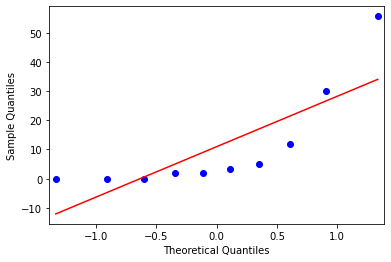

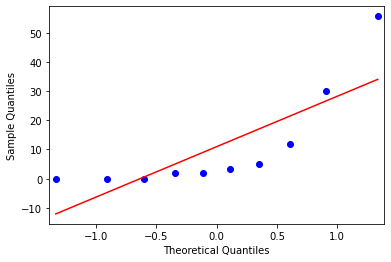

In [19]:
qqplot(tab_dinamica_DY['PETR3'], line='s')

c:\Users\jamir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

c:\Users\jamir\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



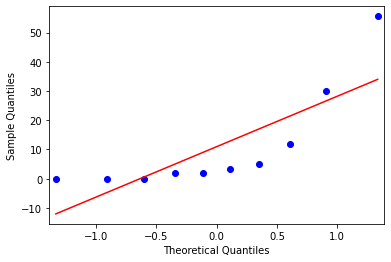

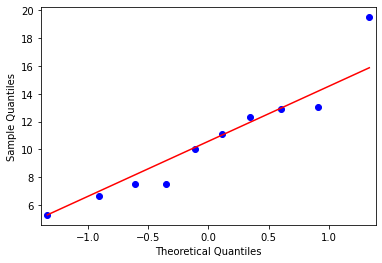

In [33]:
qqplot_data_ativo1 = qqplot(tab_dinamica_DY['PETR3'], line='s').gca().lines
qqplot_data_ativo2 = qqplot(tab_dinamica_DY['VIVT3'], line='s').gca().lines

In [34]:
fig_qqplot = go.Figure()

fig_qqplot.add_trace({'type': 'scatter',
    'x': qqplot_data_ativo1[0].get_xdata(),
    'y': qqplot_data_ativo1[0].get_ydata(),
    'mode': 'markers', 'line': {'color': 'red'},
    'name':'PETR3'})

fig_qqplot.add_trace({
    'type': 'scatter',
    'x': qqplot_data_ativo1[1].get_xdata(),
    'y': qqplot_data_ativo1[1].get_ydata(),
    'mode': 'lines', 'line': {'color': 'red'},
    "showlegend": False})

fig_qqplot.add_trace({'type': 'scatter',
    'x': qqplot_data_ativo2[0].get_xdata(),
    'y': qqplot_data_ativo2[0].get_ydata(),
    'mode': 'markers', 'line': {'color': 'blue'},
    'name':'VIVT3'})

fig_qqplot.add_trace({
    'type': 'scatter',
    'x': qqplot_data_ativo2[1].get_xdata(),
    'y': qqplot_data_ativo2[1].get_ydata(),
    'mode': 'lines', 'line': {'color': 'blue'},
    "showlegend": False})

fig_qqplot.update_layout(title='Quantile-Quantile Plot', xaxis_title="<b>Theoritical Quantiles",
                yaxis_title="<b>Sample Quantiles", legend_title="",
                font=dict(family="Arial",size=15,color="black"),
                margin=dict(l=20, r=20, t=50, b=20), template = 'simple_white', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.75,xanchor="left",x=0.05),
                width=600,height=400)

fig_qqplot.show()

## 2.4. Análises por setor

In [35]:
setores_IBOV = {"Setor": {"AZUL4" : "Bens_Industriais", 
                "CCRO3" : "Bens_Industriais", 
                "ECOR3" : "Bens_Industriais", 
                "EMBR3" : "Bens_Industriais", 
                "GOLL4" : "Bens_Industriais", 
                "RAIL3" : "Bens_Industriais", 
                "RENT3" : "Bens_Industriais", 
                "WEGE3" : "Bens_Industriais", 
                "CSAN3" : "Combustiveis", 
                "PETR3" : "Combustiveis", 
                "PETR4" : "Combustiveis", 
                "PRIO3" : "Combustiveis", 
                "RRRP3" : "Combustiveis", 
                "UGPA3" : "Combustiveis", 
                "VBBR3" : "Combustiveis", 
                "ALPA4" : "Consumo_ciclico", 
                "AMER3" : "Consumo_ciclico", 
                "ARZZ3" : "Consumo_ciclico", 
                "CVCB3" : "Consumo_ciclico", 
                "CYRE3" : "Consumo_ciclico", 
                "EZTC3" : "Consumo_ciclico", 
                "LREN3" : "Consumo_ciclico", 
                "MGLU3" : "Consumo_ciclico", 
                "MRVE3" : "Consumo_ciclico", 
                "PETZ3" : "Consumo_ciclico", 
                "SOMA3" : "Consumo_ciclico", 
                "VIIA3" : "Consumo_ciclico", 
                "BEEF3" : "Consumo_nao_basico", 
                "BRFS3" : "Consumo_nao_basico", 
                "JBSS3" : "Consumo_nao_basico", 
                "MRFG3" : "Consumo_nao_basico", 
                "SMTO3" : "Consumo_nao_basico", 
                "ABEV3" : "Consumo_nao_ciclico", 
                "ASAI3" : "Consumo_nao_ciclico", 
                "CRFB3" : "Consumo_nao_ciclico", 
                "NTCO3" : "Consumo_nao_ciclico", 
                "PCAR3" : "Consumo_nao_ciclico", 
                "RAIZ4" : "Consumo_nao_ciclico", 
                "SLCE3" : "Consumo_nao_ciclico", 
                "B3SA3" : "Financeiro_outros", 
                "BBAS3" : "Financeiro_outros", 
                "BBDC3" : "Financeiro_outros", 
                "BBDC4" : "Financeiro_outros", 
                "BBSE3" : "Financeiro_outros", 
                "BPAC11" : "Financeiro_outros", 
                "BPAN4" : "Financeiro_outros", 
                "BRML3" : "Financeiro_outros", 
                "CIEL3" : "Financeiro_outros", 
                "IGTI11" : "Financeiro_outros", 
                "IRBR3" : "Financeiro_outros", 
                "ITSA4" : "Financeiro_outros", 
                "ITUB4" : "Financeiro_outros", 
                "MULT3" : "Financeiro_outros", 
                "SANB11" : "Financeiro_outros", 
                "SULA11" : "Financeiro_outros", 
                "BRAP4" : "Materiais_basicos", 
                "BRKM5" : "Materiais_basicos", 
                "CMIN3" : "Materiais_basicos", 
                "CSNA3" : "Materiais_basicos", 
                "DXCO3" : "Materiais_basicos", 
                "GGBR4" : "Materiais_basicos", 
                "GOAU4" : "Materiais_basicos", 
                "KLBN11" : "Materiais_basicos", 
                "SUZB3" : "Materiais_basicos", 
                "USIM5" : "Materiais_basicos", 
                "VALE3" : "Materiais_basicos", 
                "FLRY3" : "Saude", 
                "HAPV3" : "Saude", 
                "HYPE3" : "Saude", 
                "QUAL3" : "Saude", 
                "RADL3" : "Saude", 
                "RDOR3" : "Saude", 
                "CASH3" : "Tecn_Inform_Educacao", 
                "COGN3" : "Tecn_Inform_Educacao", 
                "LWSA3" : "Tecn_Inform_Educacao", 
                "POSI3" : "Tecn_Inform_Educacao", 
                "TIMS3" : "Tecn_Inform_Educacao", 
                "TOTS3" : "Tecn_Inform_Educacao", 
                "VIVT3" : "Tecn_Inform_Educacao", 
                "YDUQ3" : "Tecn_Inform_Educacao", 
                "CMIG4" : "Utilidade_publica", 
                "CPFE3" : "Utilidade_publica", 
                "CPLE6" : "Utilidade_publica", 
                "EGIE3" : "Utilidade_publica", 
                "ELET3" : "Utilidade_publica", 
                "ELET6" : "Utilidade_publica", 
                "ENBR3" : "Utilidade_publica", 
                "ENEV3" : "Utilidade_publica", 
                "ENGI11" : "Utilidade_publica", 
                "EQTL3" : "Utilidade_publica", 
                "SBSP3" : "Utilidade_publica", 
                "TAEE11" : "Utilidade_publica"
                }}

ativos_setor = pd.DataFrame.from_dict(setores_IBOV)
ativos_setor.index.name = 'Ativos'

In [36]:
tab_dinamica_DY_long = pd.melt(tab_dinamica_DY, ignore_index=False)
tab_dinamica_DY_long['Ano'] = tab_dinamica_DY_long.index
DY_setorial = pd.merge(tab_dinamica_DY_long, ativos_setor, left_on='variable', right_on='Ativos')
DY_setorial = DY_setorial[['variable', 'Setor', 'Ano', 'value']]
DY_setorial.columns = ['Ativo', 'Setor', 'Ano', 'DY_%']
DY_media_setor = pd.pivot_table(DY_setorial, values=DY_setorial, index=['Ano'], columns=['Setor'], aggfunc='mean')
DY_media_setor.loc['Media_setor'] = DY_media_setor.mean()
DY_media_setor[('DY_%', 'Media_ano')] = DY_media_setor.mean(axis=1)
DY_media_setor = DY_media_setor.droplevel(0,axis=1)
DY_media_setor

C:\Users\jamir\AppData\Local\Temp\ipykernel_13020\3051003287.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Setor,Bens_Industriais,Combustiveis,Consumo_ciclico,Consumo_nao_basico,Consumo_nao_ciclico,Financeiro_outros,Materiais_basicos,Saude,Tecn_Inform_Educacao,Utilidade_publica,Media_ano
Ano,,,,,,,,,,,
2013,6.620000,2.2800,2.0110,0.6720,1.596667,4.963077,3.530000,1.5125,4.891667,12.781667,4.085858
2014,4.738333,7.7300,3.0250,0.6840,3.606667,5.891538,6.190000,2.8250,4.571667,13.634167,5.289637
2015,3.685000,0.9400,6.4680,1.0340,5.236667,7.697692,9.602222,5.4350,4.855000,5.455833,5.040941
2016,2.513333,1.5760,2.9300,1.6600,3.706667,4.293077,1.666667,5.7875,5.001667,6.192500,3.532741
2017,2.111667,0.7500,3.4910,1.0140,5.053333,3.788462,2.315556,2.5000,2.803333,5.072500,2.889985
2018,2.606667,3.1940,2.9090,0.7440,8.426667,5.949231,4.822222,5.1525,4.356667,5.789167,4.395012
2019,1.038333,2.4940,2.2010,0.6160,2.740000,4.920769,5.924444,2.8725,2.153333,3.750000,2.871038
2020,0.806667,1.5080,1.4170,1.4440,5.480000,4.468462,1.594444,1.9150,3.231667,6.025000,2.789024
2021,0.603333,13.9940,2.1190,9.9900,5.690000,5.203077,15.858889,6.1675,2.950000,8.249167,7.082497


In [37]:
DY_media_setor.iloc[-1].sort_values(ascending=False)

Setor
Utilidade_publica       7.349917
Combustiveis            6.018800
Materiais_basicos       6.005000
Financeiro_outros       5.044154
Media_ano               4.428077
Consumo_nao_ciclico     4.392667
Tecn_Inform_Educacao    3.774500
Saude                   3.697000
Consumo_ciclico         2.896700
Bens_Industriais        2.571833
Consumo_nao_basico      2.530200
Name: Media_setor, dtype: float64

In [38]:
DY_media_setor.iloc[:,-1].sort_values(ascending=False)

Ano
2021           7.082497
2022           6.304038
2014           5.289637
2015           5.040941
Media_setor    4.428077
2018           4.395012
2013           4.085858
2016           3.532741
2017           2.889985
2019           2.871038
2020           2.789024
Name: Media_ano, dtype: float64

In [41]:
DY_media_setor_long = pd.melt(DY_media_setor, ignore_index=False)
DY_media_setor_long['Ano'] = DY_media_setor_long.index

fig_DY_setores = px.line(DY_media_setor_long, x="Ano", y="value", color="Setor")
fig_DY_setores.update_traces(line_width=3)
fig_DY_setores.update_layout(title="", xaxis_title="<b>Ano",
                            yaxis_title="<b>Valor normalizado",
                            legend_title="",
                            font=dict(family="Arial, Arial, Arial", size=13, color="black"),
                            width=800, height=600, template = 'simple_white',
                            paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))

fig_DY_setores.show()


## 2.5. Dividend Yield flutuante (Rolling Dividend)

In [76]:
# Importante colocar o "365D" como string e não integer (contaria linhas e nao dias)
# Vamos remover o ano de 2012 para que não fique subestimado (necessários 365 dias para o primeiro valor da soma)

tickers_dividends[['VIVT3.SA','VALE3.SA']].rolling('365D').sum().vbt.plot(width = 800, height = 500).\
    update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b> Dividendos pagos", legend_title="",
    font=dict(family="Arial, Arial, Arial",size=20,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),xaxis=dict(range=['2013', '2022']))

FigureWidget({
    'data': [{'name': 'VIVT3.SA',
              'showlegend': True,
              'type': 'scat…

Plotar todas ao mesmo tempo

In [96]:
tabela_DY_anual_rolling.vbt.plot(width = 800, height = 500).\
    update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b> Dividendos pagos", legend_title="",
    font=dict(family="Arial, Arial, Arial",size=10,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),xaxis=dict(range=['2013', '2022']))

FigureWidget({
    'data': [{'name': 'ABEV3.SA',
              'showlegend': True,
              'type': 'scat…

Tirar a média de todo o período para examinar os melhores pagadores

In [97]:
# Classificar em ordem decrescente

Media_DY_rolling = tabela_DY_anual_rolling.mean()
Media_DY_rolling.sort_values(ascending=False, inplace=True)
Media_DY_rolling

symbol
TAEE11.SA    15.016922
CMIG4.SA     14.054485
ELET6.SA     11.459641
VIVT3.SA     10.441693
CPLE6.SA      9.148469
               ...    
GOLL4.SA      0.000000
PRIO3.SA      0.000000
AZUL4.SA      0.000000
AMER3.SA      0.000000
IGTI11.SA     0.000000
Length: 91, dtype: float64

In [98]:
# Pegar os 20 maiores

Top_20_DY_rolling = Media_DY_rolling.head(20)
Top_20_DY_rolling

symbol
TAEE11.SA    15.016922
CMIG4.SA     14.054485
ELET6.SA     11.459641
VIVT3.SA     10.441693
CPLE6.SA      9.148469
BRAP4.SA      9.117708
BBSE3.SA      8.783304
BBAS3.SA      8.582915
ELET3.SA      8.448803
EGIE3.SA      8.147309
SANB11.SA     8.125651
VBBR3.SA      7.836761
CSNA3.SA      7.430658
ENBR3.SA      6.619630
MRVE3.SA      6.338612
VALE3.SA      6.288554
ITSA4.SA      6.132588
BRKM5.SA      6.117629
SLCE3.SA      5.971671
EZTC3.SA      5.784713
dtype: float64

Criar uma lista com os Top 20 dividendos

In [99]:
top20_tickers = list(Top_20_DY_rolling.index)
top20_tickers

['TAEE11.SA',
 'CMIG4.SA',
 'ELET6.SA',
 'VIVT3.SA',
 'CPLE6.SA',
 'BRAP4.SA',
 'BBSE3.SA',
 'BBAS3.SA',
 'ELET3.SA',
 'EGIE3.SA',
 'SANB11.SA',
 'VBBR3.SA',
 'CSNA3.SA',
 'ENBR3.SA',
 'MRVE3.SA',
 'VALE3.SA',
 'ITSA4.SA',
 'BRKM5.SA',
 'SLCE3.SA',
 'EZTC3.SA']

Visualizando os Top 20 Dividendos

In [100]:
tabela_DY_anual_rolling[top20_tickers].vbt.plot(width = 800, height = 500).\
    update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b> Dividendos pagos", legend_title="",
    font=dict(family="Arial, Arial, Arial",size=10,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),xaxis=dict(range=['2013', '2022']))

FigureWidget({
    'data': [{'name': 'TAEE11.SA',
              'showlegend': True,
              'type': 'sca…

Ou até do Top 5

In [101]:
tabela_DY_anual_rolling[top20_tickers[0:5]].vbt.plot(width = 800, height = 500).\
    update_layout(title='', xaxis_title="<b>Data", yaxis_title="<b> Dividendos pagos", legend_title="",
    font=dict(family="Arial, Arial, Arial",size=10,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
    margin=dict(l=20, r=20, t=20, b=20),xaxis=dict(range=['2013', '2022']))

FigureWidget({
    'data': [{'name': 'TAEE11.SA',
              'showlegend': True,
              'type': 'sca…

# **3. Análises de Crescimento**

## 3.1. Obtenção dos dados

Lista atual (25/11/2022) do IBOV (92 ativos)<p>
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm)

In [31]:
ativos_IBOV = ["ABEV3", "ALPA4", "AMER3", "ARZZ3", "ASAI3", "AZUL4", "B3SA3", "BBAS3", "BBDC3", "BBDC4", "BBSE3", "BEEF3", "BPAC11", "BPAN4", "BRAP4", "BRFS3",
               "BRKM5", "BRML3", "CASH3", "CCRO3", "CIEL3", "CMIG4", "CMIN3", "COGN3", "CPFE3", "CPLE6", "CRFB3", "CSAN3", "CSNA3", "CVCB3", "CYRE3", "DXCO3",
               "ECOR3", "EGIE3", "ELET3", "ELET6", "EMBR3", "ENBR3", "ENEV3", "ENGI11", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "HAPV3", "HYPE3",
               "IGTI11", "IRBR3", "ITSA4", "ITUB4", "JBSS3", "KLBN11", "LREN3", "LWSA3", "MGLU3", "MRFG3", "MRVE3", "MULT3", "NTCO3", "PCAR3", "PETR3", "PETR4",
               "PETZ3", "POSI3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "RAIZ4", "RDOR3", "RENT3", "RRRP3", "SANB11", "SBSP3", "SLCE3", "SMTO3", "SOMA3", "SULA11",
               "SUZB3", "TAEE11", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VBBR3", "VIIA3", "VIVT3", "WEGE3", "YDUQ3"]

ativos_IBOV_yf = [ativos_IBOV + '.SA' for ativos_IBOV in ativos_IBOV]

In [32]:
open_close = yf.download(ativos_IBOV_yf, period='max')[['Open', 'Close']]

[*********************100%***********************]  92 of 92 completed


In [75]:
ano_inicial = '2013'

open_close = open_close.replace(to_replace=r'.SA$', value='',regex=True)
df_open_filtro = open_close[('Open')][open_close[('Open')].index>=ano_inicial]
df_close_filtro = open_close[('Close')][open_close[('Close')].index>=ano_inicial]
df_open_filtro['Ano'] = df_open_filtro.index.year
df_close_filtro['Ano'] = df_close_filtro.index.year

ativos_filtro = pd.pivot_table(df_open_filtro, values=df_open_filtro, index=['Ano'], columns=[], aggfunc='first')
ativos_filtro_2 = pd.pivot_table(df_close_filtro, values=df_close_filtro, index=['Ano'], columns=[], aggfunc='last')

ls_ativos_filtro = []

for i in ativos_filtro:
    if (ativos_filtro[i].iloc[0]>0) and (ativos_filtro_2[i].iloc[-1]>0):
        ls_ativos_filtro.append(i)

df_open_filtro = df_open_filtro[ls_ativos_filtro]
df_close_filtro = df_close_filtro[ls_ativos_filtro]
df_open_filtro.columns = [i.replace('.SA','') for i in df_open_filtro.columns]
df_close_filtro.columns = [i.replace('.SA','') for i in df_close_filtro.columns]

## 3.2. Crescimento nos últimos anos

In [76]:
df_open_filtro['Ano'] = df_open_filtro.index.year
df_close_filtro['Ano'] = df_close_filtro.index.year

open_inicial = pd.pivot_table(df_open_filtro, values=df_open_filtro, index=['Ano'], columns=[], aggfunc='first')
close_final = pd.pivot_table(df_close_filtro, values=df_close_filtro, index=['Ano'], columns=[], aggfunc='last')
df_result = ((close_final-open_inicial)/open_inicial*100).apply(lambda x: x.round(2))
df_result

,ABEV3,ALPA4,AMER3,ARZZ3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIIA3,VIVT3,WEGE3,YDUQ3
Ano,,,,,,,,,,,,,,,,,,,,,
2013,1.99,7.81,-12.74,-25.83,-22.11,-6.15,2.46,-10.67,44.54,1.86,...,-18.42,49.09,-9.99,20.58,8.23,-16.95,66.89,-9.81,14.31,45.99
2014,-5.83,-46.22,57.53,-9.20,-11.99,-2.78,7.35,20.73,30.40,-14.51,...,3.69,-5.97,-5.49,-9.01,-64.56,-38.99,-9.45,1.81,26.92,14.52
2015,10.59,-0.84,-31.21,-21.11,11.01,-37.09,-26.93,-33.42,-23.61,34.21,...,-11.84,-41.37,-11.85,18.30,-69.31,-39.95,-77.94,-11.16,-2.92,-41.88
2016,-7.50,42.59,-32.76,19.50,53.77,94.53,58.68,67.72,18.66,-7.53,...,24.71,15.32,-22.28,16.33,171.52,105.60,153.52,11.93,4.31,14.08
2017,30.23,74.33,105.79,118.28,40.10,14.05,22.37,29.42,2.30,-12.35,...,3.04,69.25,24.54,11.23,121.95,59.26,111.47,15.70,56.56,107.72
2018,-27.89,-1.79,105.28,0.66,17.13,44.87,15.35,24.86,-3.70,-53.67,...,10.64,-10.02,-10.04,-29.36,0.44,26.11,-44.64,-0.63,-6.36,-27.23
2019,21.23,143.69,51.67,17.99,60.04,14.33,20.32,12.30,35.22,157.83,...,30.78,32.24,138.82,-4.21,3.26,6.58,153.86,17.91,96.71,101.70
2020,-17.02,27.35,20.26,6.53,43.54,-27.27,-22.48,-18.28,-22.03,-19.62,...,7.22,-6.33,32.05,-6.83,52.19,62.00,42.63,-4.28,117.02,-31.20
2021,-2.34,-13.08,-58.94,12.60,-46.22,-26.46,-27.31,-23.24,-29.97,3.62,...,7.78,-11.03,-0.93,-39.42,1.68,-12.75,-68.16,3.63,-13.04,-38.50


## 3.3. Análises descritivas dos dividendos

In [77]:
df_EAD_ativos = pd.DataFrame()

for i in df_result:
    stat, p = shapiro(df_result[i])
    mean = np.mean(df_result[i])
    median = np.median(df_result[i])
    diff_mean_median = abs(mean - median)/max(mean,median)*100
    std = np.std(df_result[i])
    cv = std/mean*100
    diff_0 = len(df_result[i][df_result[i]>0])
    cum_prod = (1+df_result[i]/100).cumprod().iloc[-1]
    ativo_stats = pd.DataFrame([i, mean, median, cum_prod, std, cv, p, diff_0, diff_mean_median]).transpose()
    ativo_stats = ativo_stats.applymap(lambda x: round(x, 3) if isinstance(x, (float, int)) else x)
    df_EAD_ativos = pd.concat([df_EAD_ativos,ativo_stats],axis=0)

df_EAD_ativos.columns = ['Ativo', 'Media', 'Median', 'Cum_prod', 'DP', 'CV', 'p_valor', 'diff_0', 'diff_mean_median']

In [79]:
df_EAD_ativos.sort_values(by='Cum_prod', ascending=False).head(15)

,Ativo,Media,Median,Cum_prod,DP,CV,p_valor,diff_0,diff_mean_median
0,WEGE3,30.928,15.040,9.257,42.539,137.543,0.060,7,51.371
0,MGLU3,114.326,53.970,8.355,214.823,187.904,0.006,6,52.793
0,PRIO3,66.868,58.310,7.550,112.299,167.942,0.416,7,12.798
0,EQTL3,23.444,21.215,7.340,18.920,80.702,0.158,9,9.508
0,ELET3,38.167,-1.530,6.953,92.102,241.314,0.000,4,104.009
0,RENT3,24.420,20.635,5.315,39.875,163.290,0.686,7,15.500
0,RADL3,25.927,26.360,4.807,45.448,175.293,0.494,6,1.643
0,SLCE3,21.320,13.530,4.667,33.947,159.227,0.567,8,36.538
0,ELET6,23.436,9.965,4.529,48.580,207.288,0.004,5,57.480
0,ENGI11,15.944,9.210,3.728,20.848,130.757,0.242,8,42.235
